In [1]:
# Import libraries
import pandas as pd
import sys
import os
import warnings
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.seasonal import STL

# Set options for displaying dataframes and figures
pd.set_option('display.max_columns', None)

# Add the path to the module to the system path
module_path = os.path.join(os.getcwd(), "module_data_prep_forecast")
sys.path.append(module_path)
import data_preparation_forecasting

# Ignore the FutureWarning temporarily
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

# EDA Forecasting

In below code of the notebook, the obtained time series for the three categories will be investigated in an exploratory manner. This includes checking whether the time-series display any systematic components such as trends or seasonality, in order to establish an idea of the modeling possibilities. 

## Explore the time-series

In [2]:
# Call the main function to obtain the dataframes
df_list = data_preparation_forecasting.main()

In [3]:
# Store the dataframes accordingly
df_fanshop = df_list[0]
df_apparel = df_list[1]
df_golf = df_list[2]

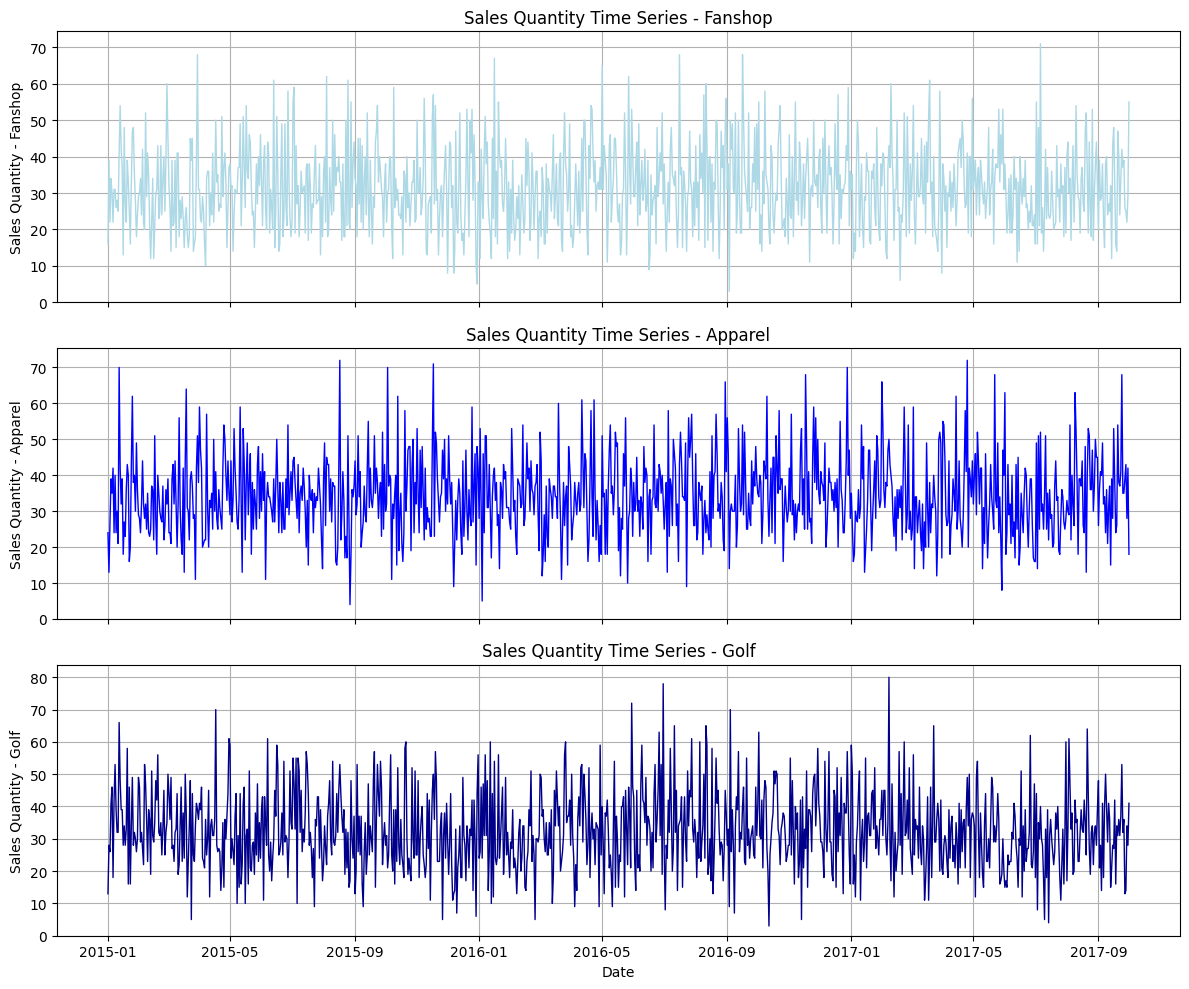

In [4]:
# Define the figure size and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plotting the time-series for fanshop products
ax1.plot(df_fanshop['Sales_Qty'], color = 'lightblue', linewidth = 1.0)
ax1.set_ylabel('Sales Quantity - Fanshop')
ax1.set_title('Sales Quantity Time Series - Fanshop')
ax1.set_ylim(bottom=0)
ax1.grid(True)

# Plotting the time-series for apparel products
ax2.plot(df_apparel['Sales_Qty'], color = 'blue', linewidth = 1.0)
ax2.set_ylabel('Sales Quantity - Apparel')
ax2.set_title('Sales Quantity Time Series - Apparel')
ax2.set_ylim(bottom=0)
ax2.grid(True)

# Plotting the time-series for golf products
ax3.plot(df_golf['Sales_Qty'], color = 'darkblue', linewidth = 1.0)
ax3.set_xlabel('Date')
ax3.set_ylabel('Sales Quantity - Golf')
ax3.set_title('Sales Quantity Time Series - Golf')
ax3.set_ylim(bottom=0)
ax3.grid(True)

plt.tight_layout()
plt.show()

**Interpretation:** all three time series do not display trends.

### Decompose the time-series

#### 1. Fanshop Data

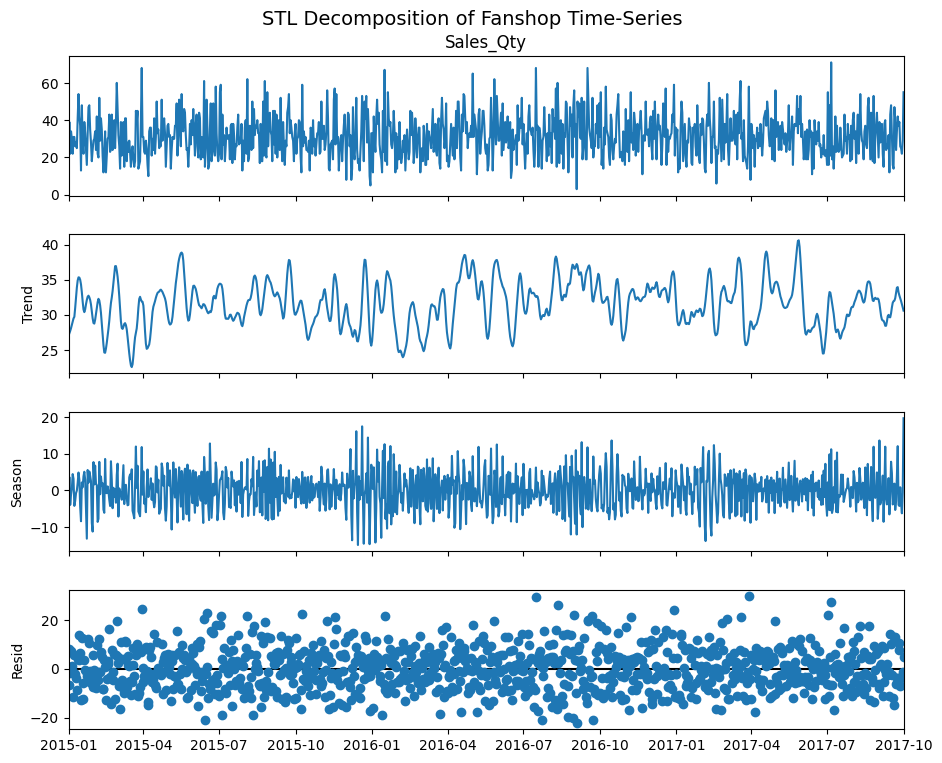

In [5]:
# Decomposition of the fanshop data
stl_decomposition_fanshop = STL(df_fanshop['Sales_Qty']).fit()
fig = stl_decomposition_fanshop.plot()

# Defining the plot specification
fig.set_size_inches(10, 8) 
fig.suptitle("STL Decomposition of Fanshop Time-Series", fontsize=14)
plt.show()

#### 2. Apparel Data

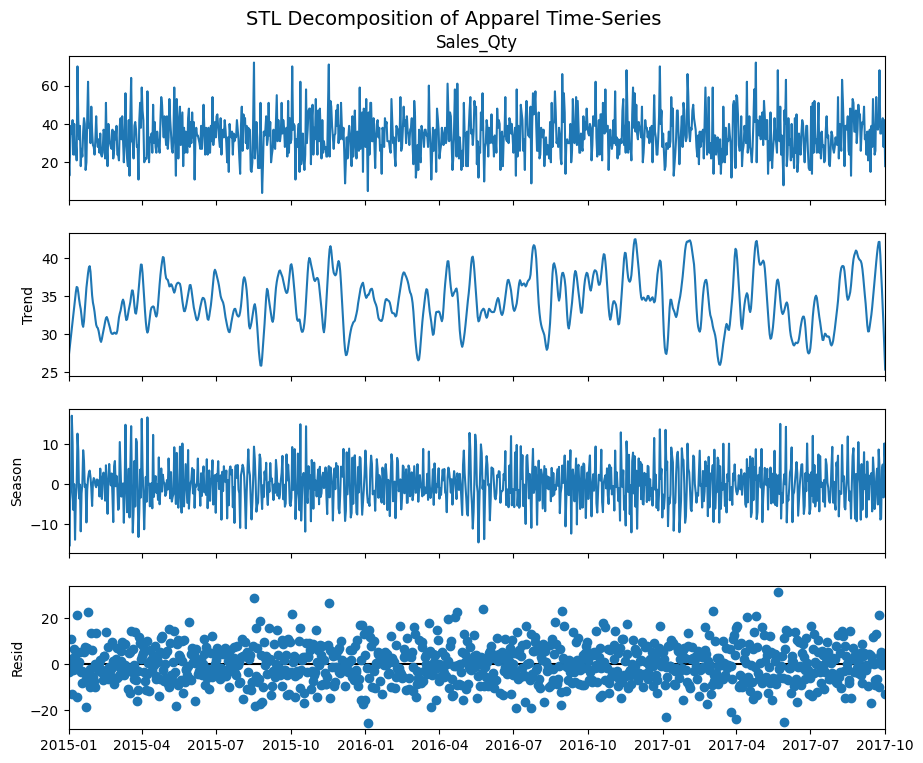

In [6]:
# Decomposition of the apparel data
stl_decomposition_apparel = STL(df_apparel['Sales_Qty']).fit()
fig = stl_decomposition_apparel.plot()

# Defining the plot specification
fig.set_size_inches(10, 8) 
fig.suptitle("STL Decomposition of Apparel Time-Series", fontsize=14)
plt.show()

#### 3. Golf Data

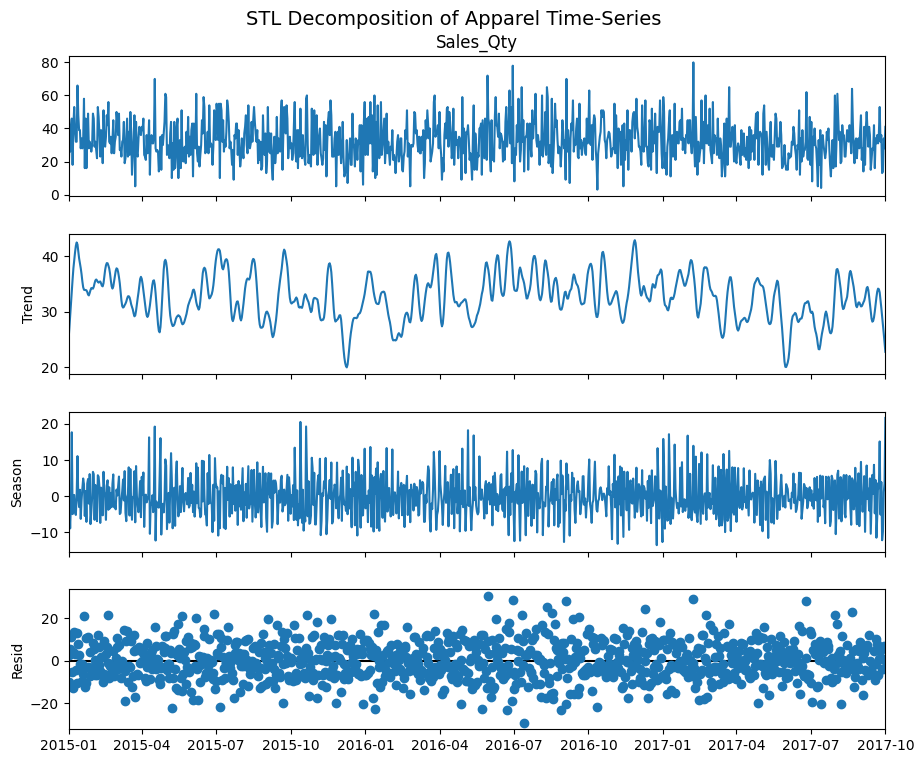

In [7]:
# Decomposition of the golf data
stl_decomposition_golf = STL(df_golf['Sales_Qty']).fit()
fig = stl_decomposition_golf.plot()

# Defining the plot specification
fig.set_size_inches(10, 8) 
fig.suptitle("STL Decomposition of Apparel Time-Series", fontsize=14)
plt.show()

# Forecasting

In [9]:
import pycaret
from pycaret.time_series import *

In [10]:
df_fanshop = df_fanshop["Sales_Qty"]

In [12]:
# Setup the forecasting: 3-fold cross-validation where we have by default an ExpandingWindowSplitter
# We want to forecast (fh = 60) 60 days in the future, so roughly 2 months, then session id for reproduceability 
setup_fanshop = setup(df_fanshop, fold = 3, fh = 60, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Sales_Qty
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1005, 1)"
5,Transformed data shape,"(1005, 1)"
6,Transformed train set shape,"(945, 1)"
7,Transformed test set shape,"(60, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter
